In [1]:
%matplotlib inline
import phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Embedding DLA fractal tree

In [2]:
#generate DLA tree
M, C = phate.tree.gen_dla(n_dim = 100, n_branch = 20, branch_length = 100, 
                          n_drop = 0, rand_multiplier = 2, seed=37, sigma = 4)

#instantiate phate_operator
phate_operator = phate.PHATE(n_components=2, a=10, k=5, t=30, mds='classic', 
                             knn_dist='euclidean', mds_dist='euclidean', njobs=-2)

#run phate with classic MDS
Y_cmds = phate_operator.fit_transform(M)

#run phate with metric MDS
phate_operator.reset_mds(mds="metric") #change the MDS embedding without recalculating diffusion potential
Y_mmds = phate_operator.fit_transform(M)

#run phate with nonmetric MDS
phate_operator.reset_mds(mds="nonmetric")
Y_nmmds = phate_operator.fit_transform(M)

Bulding kNN graph and diffusion operator...
Built graph and diffusion operator in 2.28 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.76 seconds.
Embedding data using classic MDS...
Embedded data in 7.77 seconds.
Finished PHATE embedding in 7.77 seconds.

Using precomputed diffusion operator
Using precomputed diffusion potential...
Embedding data using metric MDS...
Embedded data in 43.13 seconds.
Finished PHATE embedding in 43.13 seconds.

Using precomputed diffusion operator
Using precomputed diffusion potential...
Embedding data using nonmetric MDS...
Embedded data in 1103.98 seconds.
Finished PHATE embedding in 1103.98 seconds.



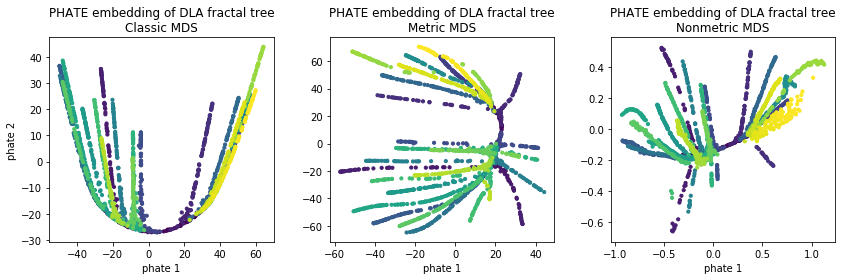

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)

f.set_size_inches(12,4)

#plotting PHATE - classic MDS
ax1.scatter(Y_cmds[:,0], Y_cmds[:, 1], s=10, c=C)
ax1.set_xlabel("phate 1")
ax1.set_ylabel("phate 2")
ax1.set_title("PHATE embedding of DLA fractal tree\nClassic MDS")

#plotting PHATE - metric MDS
ax2.scatter(Y_mmds[:,0], Y_mmds[:, 1], s=10, c=C)
ax2.set_xlabel("phate 1")
ax2.set_title("PHATE embedding of DLA fractal tree\nMetric MDS")

#plotting PHATE - nonmetric MDS
ax3.scatter(Y_nmmds[:,0], Y_nmmds[:, 1], s=10, c=C)
ax3.set_xlabel("phate 1")
ax3.set_title("PHATE embedding of DLA fractal tree\nNonmetric MDS")

plt.tight_layout()

### Embedding mESC

In [4]:
data = pd.read_csv("../../data/GSM1599499_ES_d7_LIFminus.csv.gz", index_col=0, header=None).T #PHATE expects shape (ncells, ndim)
#normalize data
data_norm = phate.preprocessing.library_size_normalize(data)

#Get colors to color embeddings by
C = np.log(data_norm[:,data.columns == 'Actb'] + 0.1)

#dimnesionality reduction using PCA
data_reduced = phate.preprocessing.pca_reduce(data_norm, n_components=100)

#run PHATE
phater_operator = phate.PHATE(t=25, a=50, k=4, mds='classic', mds_dist='cosine')
Y_cmds = phater_operator.fit_transform(data_reduced)

Running PCA to 100 dimensions using auto PCA...
Bulding kNN graph and diffusion operator...
Built graph and diffusion operator in 0.19 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.16 seconds.
Embedding data using classic MDS...
Embedded data in 0.56 seconds.
Finished PHATE embedding in 0.56 seconds.



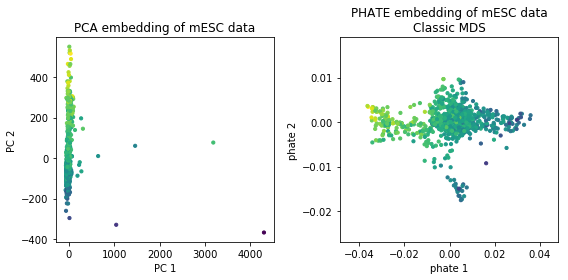

In [5]:
f, (ax1, ax2) = plt.subplots(1,2)

f.set_size_inches(8,4)

#plotting PCA
ax1.scatter(data_reduced[:,0], data_reduced[:,1], s=10, c=C)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_title("PCA embedding of mESC data")

#plotting PHATE - classic MDS
ax2.scatter(Y_cmds[:,0], Y_cmds[:,1], s=10, c=C)
ax2.set_xlabel("phate 1")
ax2.set_ylabel("phate 2")
ax2.set_title("PHATE embedding of mESC data\nClassic MDS")

plt.tight_layout()